In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#importing the csv files
df=pd.read_csv('/content/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
#general overview of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
#calculating no. of null values
null_count=df["Postal Code"].isnull().sum()
print(null_count)

11


In [10]:
#filling zero to the empty column
df["Postal Code"].fillna(0, inplace=True)

In [11]:
#resetting the column types into appropriate datatypes
df["Postal Code"]=df["Postal Code"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [12]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [13]:
#checking for duplicates
if df.duplicated().sum() > 0:
  print('Dulicates found')
else:
  print('No duplicates exist')

No duplicates exist


In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [15]:
df.duplicated(keep=False).sum()

0

In [16]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [17]:
#types of customers
types_of_customers=df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [18]:
#no. of customers in each segment
number_of_customers=df['Segment'].value_counts().reset_index()
number_of_customers=number_of_customers.rename(columns={'index':'Customer Type', 'Segment':'Total Customers'})
print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


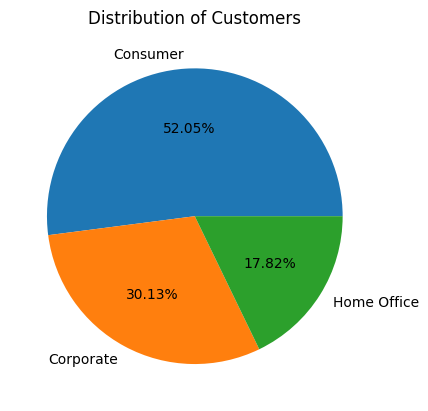

In [19]:
#Plotting a pie chart
plt.pie(number_of_customers['Total Customers'], labels=number_of_customers['Customer Type'], autopct='%1.2f%%')

plt.title('Distribution of Customers')
plt.show()

In [20]:
#Customer and sales

sales_per_category=df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category=sales_per_category.rename(columns={'Segment':'Customer Type', 'Sales': 'Total Sales'})
print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


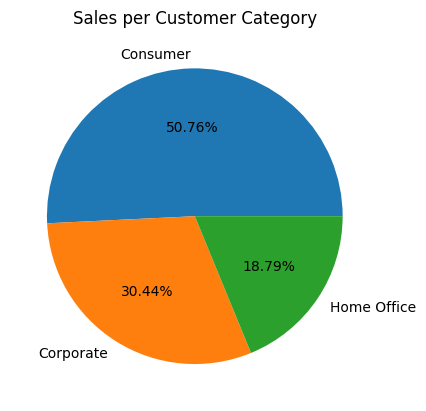

In [22]:
#plotting
plt.pie(sales_per_category['Total Sales'], labels=sales_per_category['Customer Type'], autopct='%1.2f%%')

plt.title('Sales per Customer Category')
plt.show()


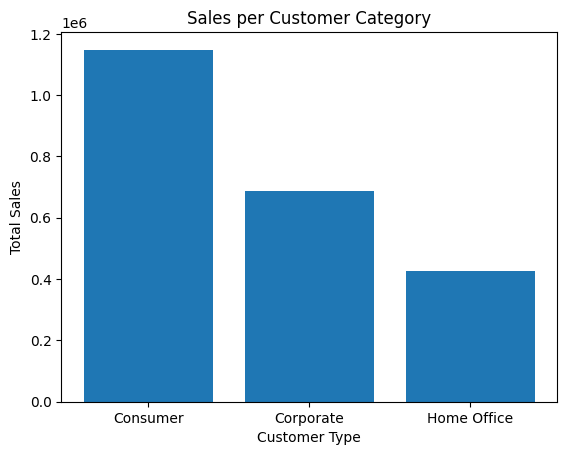

In [23]:
#Bar Graph

plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

In [24]:
#Customer Loyalty
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [28]:
#Grouping data according to Customer id, Customer Name, Segment and calculate the freq. of their orders

customer_order_freq=df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

customer_order_freq.rename(columns={'Order ID': 'Order Count'}, inplace=True)

print(customer_order_freq)

    Customer ID       Customer Name    Segment  Order Count
0      AA-10315          Alex Avila   Consumer           11
1      AA-10375        Allen Armold   Consumer           15
2      AA-10480        Andrew Allen   Consumer           12
3      AA-10645       Anna Andreadi   Consumer           18
4      AB-10015       Aaron Bergman   Consumer            6
..          ...                 ...        ...          ...
788    XP-21865        Xylona Preis   Consumer           28
789    YC-21895      Yoseph Carroll  Corporate            8
790    YS-21880       Yana Sorensen  Corporate           12
791    ZC-21910    Zuschuss Carroll   Consumer           31
792    ZD-21925  Zuschuss Donatelli   Consumer            9

[793 rows x 4 columns]


In [30]:
#find the repating customer orders
repetitive_customers=customer_order_freq[customer_order_freq['Order Count']>1]
print(repetitive_customers)

    Customer ID       Customer Name    Segment  Order Count
0      AA-10315          Alex Avila   Consumer           11
1      AA-10375        Allen Armold   Consumer           15
2      AA-10480        Andrew Allen   Consumer           12
3      AA-10645       Anna Andreadi   Consumer           18
4      AB-10015       Aaron Bergman   Consumer            6
..          ...                 ...        ...          ...
788    XP-21865        Xylona Preis   Consumer           28
789    YC-21895      Yoseph Carroll  Corporate            8
790    YS-21880       Yana Sorensen  Corporate           12
791    ZC-21910    Zuschuss Carroll   Consumer           31
792    ZD-21925  Zuschuss Donatelli   Consumer            9

[787 rows x 4 columns]


In [31]:
#sort the repeating/frequent customer orders in descending order
sorted_frequent_customers=repetitive_customers.sort_values(by='Order Count', ascending=False)

print(sorted_frequent_customers)

    Customer ID      Customer Name      Segment  Order Count
787    WB-21850      William Brown     Consumer           35
606    PP-18955         Paul Prost  Home Office           34
482    MA-17560       Matt Abelman  Home Office           34
387    JL-15835           John Lee     Consumer           33
720    SV-20365        Seth Vernon     Consumer           32
..          ...                ...          ...          ...
650    RM-19750      Roland Murray     Consumer            2
593    PH-18790  Patricia Hirasaki  Home Office            2
49     AR-10570     Anemone Ratner     Consumer            2
552    NB-18580     Nicole Brennan    Corporate            2
266    EL-13735          Ed Ludwig  Home Office            2

[787 rows x 4 columns]


In [32]:
print(sorted_frequent_customers.head(10))

    Customer ID        Customer Name      Segment  Order Count
787    WB-21850        William Brown     Consumer           35
606    PP-18955           Paul Prost  Home Office           34
482    MA-17560         Matt Abelman  Home Office           34
387    JL-15835             John Lee     Consumer           33
720    SV-20365          Seth Vernon     Consumer           32
349    JD-15895     Jonathan Doherty    Corporate           32
147    CK-12205  Chloris Kastensmidt     Consumer           32
44     AP-10915       Arthur Prichep     Consumer           31
275    EP-13915           Emily Phan     Consumer           31
791    ZC-21910     Zuschuss Carroll     Consumer           31


In [34]:
print(sorted_frequent_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Order Count
0    WB-21850        William Brown     Consumer           35
1    PP-18955           Paul Prost  Home Office           34
2    MA-17560         Matt Abelman  Home Office           34
3    JL-15835             John Lee     Consumer           33
4    SV-20365          Seth Vernon     Consumer           32
5    JD-15895     Jonathan Doherty    Corporate           32
6    CK-12205  Chloris Kastensmidt     Consumer           32
7    AP-10915       Arthur Prichep     Consumer           31
8    EP-13915           Emily Phan     Consumer           31
9    ZC-21910     Zuschuss Carroll     Consumer           31


In [36]:
#Ranking Customers on the basis of Sales

customer_sales=df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

#Sorting in descending order

top_spenders=customer_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head().reset_index(drop=True))

  Customer ID  Customer Name      Segment      Sales
0    SM-20320    Sean Miller  Home Office  25043.050
1    TC-20980   Tamara Chand    Corporate  19052.218
2    RB-19360   Raymond Buch     Consumer  15117.339
3    TA-21385   Tom Ashbrook  Home Office  14595.620
4    AB-10105  Adrian Barton     Consumer  14473.571


In [37]:
##Mode of Shipping
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [38]:
#sorting unique values in the ship mode column into a new series
shipping_mode=df['Ship Mode'].unique()
print(shipping_mode)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [45]:
#frequency of different shipping modes
shipping_freq=df['Ship Mode'].value_counts().reset_index()
shipping_freq.rename(columns={'index': 'Mode of Shipment', 'Ship Mode': 'Frequency of ship mode'}, inplace=True)
print(shipping_freq)

  Mode of Shipment  Frequency of ship mode
0   Standard Class                    5859
1     Second Class                    1902
2      First Class                    1501
3         Same Day                     538


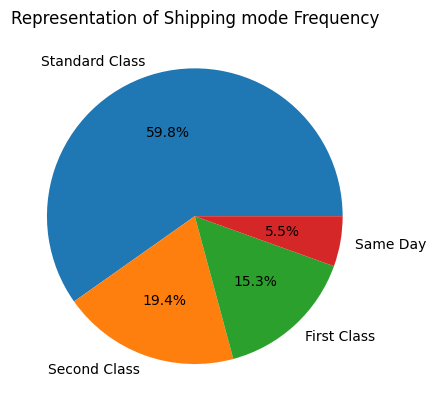

In [46]:
#Plotting a pie chart

plt.pie(shipping_freq['Frequency of ship mode'], labels=shipping_freq['Mode of Shipment'], autopct='%1.1f%%')

plt.title('Representation of Shipping mode Frequency')

plt.show()

In [52]:
##Geographical Analysis of Customers by state

state=df['State'].value_counts().reset_index()
state.rename(columns={'index': 'State', 'State': 'Customer_count'}, inplace=True)
print(state.head(10))

            State  Customer_count
0      California            1946
1        New York            1097
2           Texas             973
3    Pennsylvania             582
4      Washington             504
5        Illinois             483
6            Ohio             454
7         Florida             373
8        Michigan             253
9  North Carolina             247


In [54]:
#Customers by city
city=df['City'].value_counts().reset_index()
city.rename(columns={'index': 'City', 'City': 'Customer_count'}, inplace=True)
print(city.head(10))

            City  Customer_count
0  New York City             891
1    Los Angeles             728
2   Philadelphia             532
3  San Francisco             500
4        Seattle             426
5        Houston             374
6        Chicago             308
7       Columbus             221
8      San Diego             170
9    Springfield             161


In [57]:
#Sales per state
state_sales=df.groupby(['State'])['Sales'].sum().reset_index()

top_sales=state_sales.sort_values(by='Sales', ascending=False)

print(top_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [59]:
#Sales per City
city_sales=df.groupby(['City'])['Sales'].sum().reset_index()

top_sales=city_sales.sort_values(by='Sales', ascending=False)

print(top_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [60]:
##Product Category Segmentation

df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [61]:
#Types of product categories

product_category=df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [66]:
#group data by product category

subcategory_count=df.groupby('Category')['Sub-Category'].nunique().reset_index()

subcategory_count=subcategory_count.sort_values(by='Sub-Category', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [73]:
#Sales per Product Category

category_sales=df.groupby('Category')['Sales'].sum().reset_index()

category_sales.sort_values(by='Sales', ascending=False, inplace=True)

print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


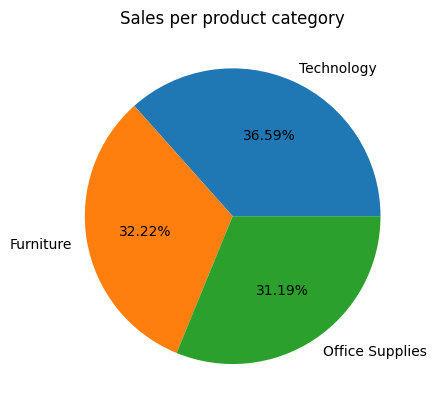

In [75]:
#Plotting a pie chart
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.2f%%')

plt.title('Sales per product category')

plt.show()

In [77]:
#Sales per Product

#group data by product sub-category

product_subcategory_sales=df.groupby('Sub-Category')['Sales'].sum().reset_index()

top_product_subcategory_sales=product_subcategory_sales.sort_values(by='Sales', ascending=False)

print(top_product_subcategory_sales.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


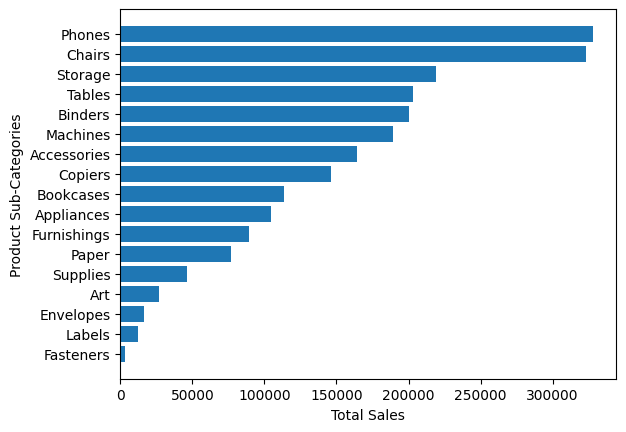

In [81]:
top_product_subcategory_sales=product_subcategory_sales.sort_values(by='Sales', ascending=True)

#plotting a bar graph
plt.barh(top_product_subcategory_sales['Sub-Category'], top_product_subcategory_sales['Sales'])
plt.ylabel('Product Sub-Categories')
plt.xlabel('Total Sales')

plt.show()

In [82]:
#Sales Trend Analysis
#Converting Order date to datetime format

df['Order Date']=pd.to_datetime(df['Order Date'], dayfirst=True)

#grouping by year and summing the sales per year
yearly_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales=yearly_sales.rename(columns={'Order Date':'Year', 'Sales':'Total Sales'})

print(yearly_sales)


   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


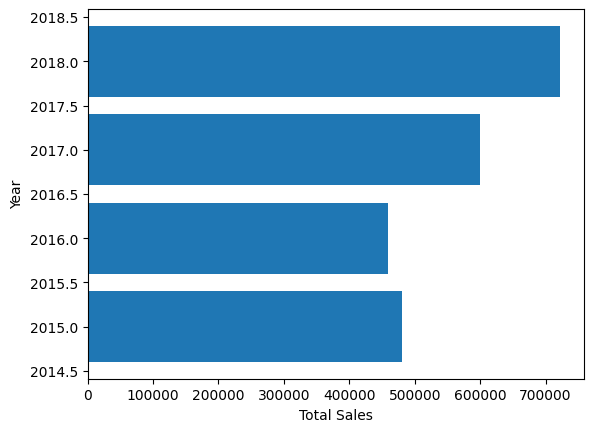

In [84]:
#plotting a bar graph
plt.barh(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.ylabel('Year')
plt.xlabel('Total Sales')

plt.show()

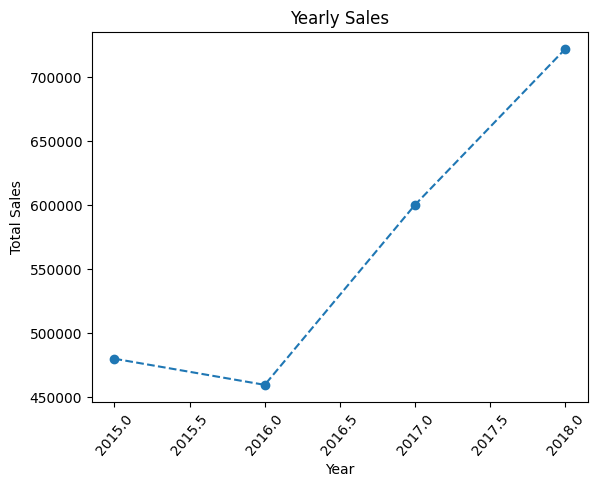

In [86]:
#plotting line graph

plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='--')

#labels
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")

plt.xticks(rotation=50)

plt.show()

In [92]:
#Quarterly Sales Trend Analysis

#convert order date to datetime format
df['Order Date']=pd.to_datetime(df['Order Date'], dayfirst=True)

#filter data according to year
year_sales=df[df['Order Date'].dt.year==2017]

#calculate the quarterly sales for year 2017
quarterly_sales=year_sales.resample('Q', on='Order Date')['Sales'].sum().reset_index()

quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales': 'Total Sales'}, inplace=True)

#print('Quarterly sales for 2017',quarterly_sales)

print(quarterly_sales)

     Quarter  Total Sales
0 2017-03-31   92686.3650
1 2017-06-30  135061.1610
2 2017-09-30  138056.3742
3 2017-12-31  234388.6498


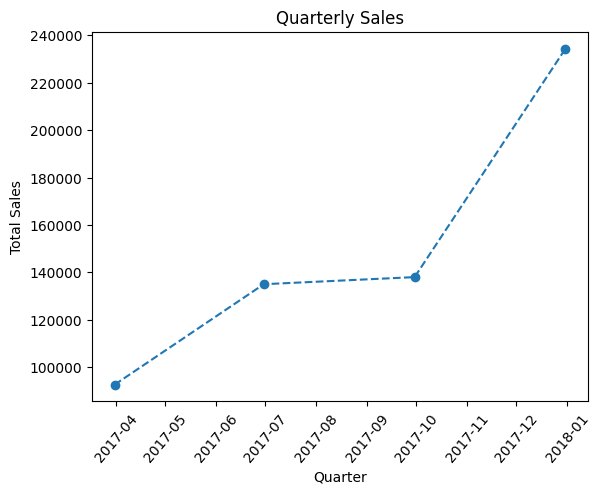

In [93]:
#plotting line graph
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')

#labels
plt.title("Quarterly Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")

plt.xticks(rotation=50)

plt.show()

In [95]:
#Monthly Sales Trend for a particular year

#converting Order Date column to datetime format

#Filter data according to year
year_sales=df[df['Order Date'].dt.year==2018]

#calculate monthly sales for year 2018
monthly_sales=year_sales.resample('M', on='Order Date')['Sales'].sum()

monthly_sales=monthly_sales.reset_index()

monthly_sales=monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Monthly Sales'})
print('Monthly sales for the year 2018')
print(monthly_sales)


Monthly sales for the year 2018
        Month  Monthly Sales
0  2018-01-31     43476.4740
1  2018-02-28     19920.9974
2  2018-03-31     58863.4128
3  2018-04-30     35541.9101
4  2018-05-31     43825.9822
5  2018-06-30     48190.7277
6  2018-07-31     44825.1040
7  2018-08-31     62837.8480
8  2018-09-30     86152.8880
9  2018-10-31     77448.1312
10 2018-11-30    117938.1550
11 2018-12-31     83030.3888


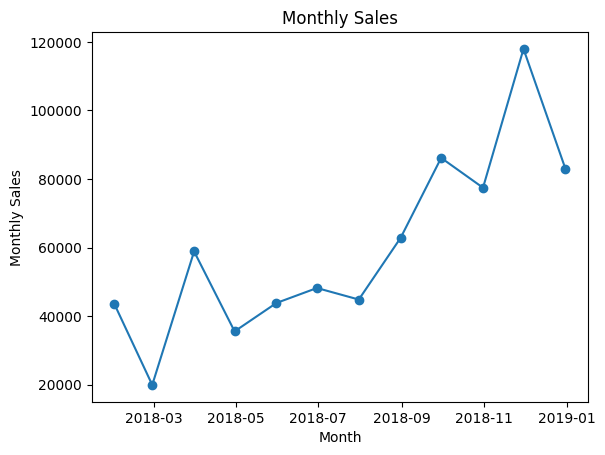

In [97]:
#plotting line chart
plt.plot(monthly_sales['Month'], monthly_sales['Monthly Sales'], marker='o')

#labels
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Monthly Sales")

plt.show()